<a href="https://colab.research.google.com/github/alexphil12/Energy-forcasting-UDLA/blob/main/prediction_power_lstm_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
mesure=["Fecha","Hora"];
mesure.append("Voltaje_(R)_[V]")	
mesure.append("Voltaje_(S)_[V]")	
mesure.append("Voltaje_(T)_[V]")	
mesure.append("Voltaje_(RS)_[V]")	
mesure.append("Voltaje_(ST)_[V]")	
mesure.append("Voltaje_(TR)_[V]")	
mesure.append("Corriente_R_[A]")	
mesure.append("Corriente_S_[A]")	
mesure.append("Corriente_T_[A]")	
mesure.append("Potencia_R_[VA]")	
mesure.append("Potencia_S_[VA]")	
mesure.append("Potencia_T_[VA]")	
mesure.append("Potencia_R_[W]")	
mesure.append("Potencia_S_[W]")	
mesure.append("Potencia_T_[W]")	
mesure.append("Potencia_R_[VAR]")	
mesure.append("Potencia_S_[VAR]")	
mesure.append("Potencia_T_[VAR]")	
mesure.append("Corriente_N_[A]")	
mesure.append("Frecuencia_[Hz]")	
mesure.append("not_sure_1")	
mesure.append("not_sure_2")	
mesure.append("not_sure_3")	
mesure.append("Potencia_3F_[KVA]")	
mesure.append("Potencia_3F_[W]")	
mesure.append("Potencia_3F_[VAR]")	
mesure.append("Factor de Potencia")

In [ ]:
data=pd.read_csv("/content/df_cov_continu_1_8.txt",sep=",",header=0,names=mesure)

In [ ]:
train_data=data.iloc[0:round(14860*0.8),:]

test_data=data.iloc[round(14860*0.8):14860,:]

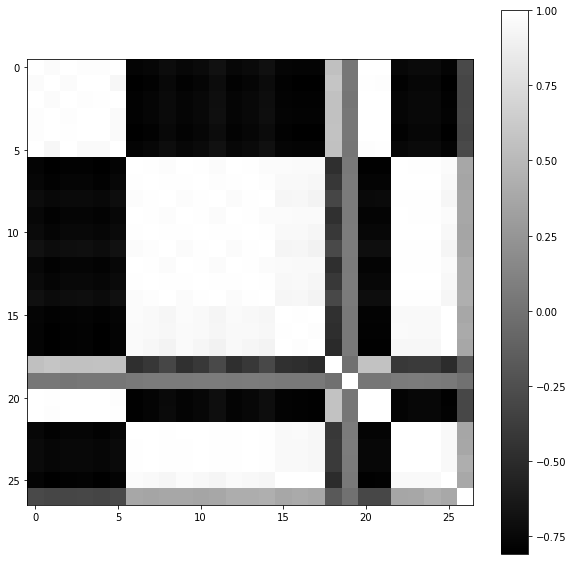

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data.corr(),cmap="gray")
plt.colorbar()

In [ ]:
train_data.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)
test_data.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


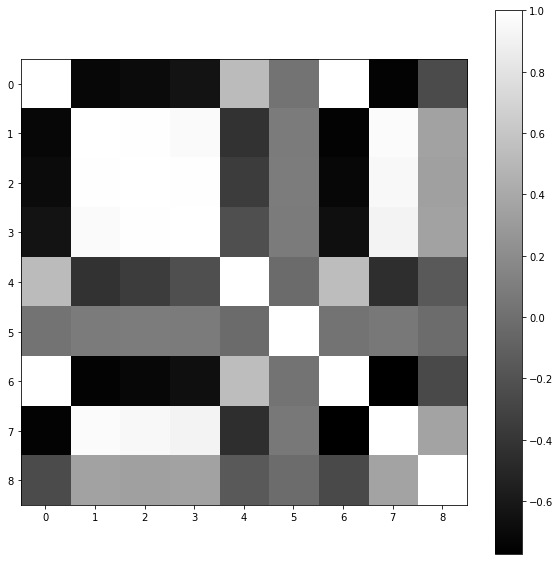

In [ ]:
RSG_train = train_data.values
RSG_test=test_data.values
plt.figure(figsize=(10,10))
plt.imshow(train_data.corr(),cmap="gray")
plt.colorbar()

In [ ]:
scaler = MinMaxScaler()
scaler2=StandardScaler()
scaler2.fit(RSG_train[:,1:4])
RSG_train_X=cp.deepcopy(RSG_train)
RSG_test_X=cp.deepcopy(RSG_test)
RSG_train_X=np.delete(RSG_train_X,[1,2,3],1)
RSG_test_X=np.delete(RSG_test_X,[1,2,3],1)
scaler.fit(RSG_train_X)

MinMaxScaler()

In [ ]:
scaled_X_train = scaler.transform(RSG_train_X)
scaled_X_test = scaler.transform(RSG_test_X)
scaled_Y_train=scaler2.transform(RSG_train[:,1:4])
scaled_Y_test=scaler2.transform(RSG_test[:,1:4])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 100
n_features = 5
train_generator = TimeseriesGenerator(scaled_X_train, scaled_Y_train, length=n_input, batch_size=1)
test_generator=TimeseriesGenerator(scaled_X_test, scaled_Y_test, length=n_input, batch_size=1)

In [ ]:
X,y = train_generator[0]
X1,y1=test_generator[0]

In [ ]:
print(f'Predicción: \n {y}')
print(f'data: \n {X}')

Predicción: 
 [[1.35822319 1.20696807 1.20830039]]
data: 
 [[[0.88297015 0.4150276  0.25242718 0.82894973 0.85024458 0.70984456]
  [0.88579871 0.39798259 0.38349515 0.83683574 0.85527947 0.70984456]
  [0.88990724 0.         0.54854369 0.84187651 0.85642934 0.69948187]
  [0.88213264 0.         0.33009709 0.82800878 0.89799382 0.66321244]
  [0.88483479 0.33131851 0.4223301  0.83374406 0.90414227 0.67875648]
  [0.88020479 0.41106274 0.33980583 0.82872569 0.89411515 0.65284974]
  [0.88717349 0.22057452 0.39320388 0.83699256 0.90524616 0.64248705]
  [0.8957856  0.         0.50485437 0.84994175 0.90883637 0.64248705]
  [0.89946747 0.03885175 0.61650485 0.85578905 0.89246338 0.59585492]
  [0.89507451 0.4343077  0.41747573 0.84935926 0.89337412 0.61139896]
  [0.89635447 0.40507658 0.47572816 0.84866475 0.8921986  0.61139896]
  [0.89253038 0.         0.50485437 0.84084595 0.89499249 0.63212435]
  [0.89072895 0.         0.41262136 0.84129402 0.90702602 0.62176166]
  [0.89240396 0.         0.4029

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout


In [ ]:
from keras.layers.recurrent_v2 import LSTM
# define model
model = Sequential()
model.add(LSTM(128, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model.add(Dense(3, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69120     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 69,507
Trainable params: 69,507
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_generator,steps_per_epoch=10, epochs=100,validation_data=test_generator)

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 1.7950 - val_loss: 1.3316
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 1.3062 - val_loss: 1.0664
Epoch 3/100
10/10 [==============================] - 19s 2s/step - loss: 57023.8672 - val_loss: 0.5116
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 0.8804 - val_loss: 1.2931
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 0.4969 - val_loss: 1.2488
Epoch 6/100
10/10 [==============================] - 19s 2s/step - loss: 0.6852 - val_loss: 1.2873
Epoch 7/100
10/10 [==============================] - 19s 2s/step - loss: 0.9135 - val_loss: 1.2948
Epoch 8/100
10/10 [==============================] - 19s 2s/step - loss: 1.1506 - val_loss: 1.2905
Epoch 9/100
10/10 [==============================] - 19s 2s/step - loss: 0.9592 - val_loss: 1.2812
Epoch 10/100
10/10 [==============================] - 19s 2s/step - loss: 0.4804 - val_loss: 1.2711
Epoch

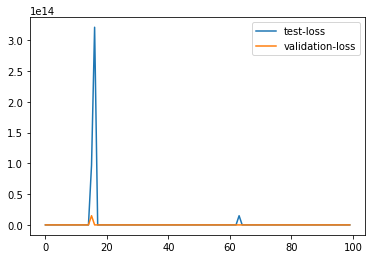

In [ ]:
loss_per_epoch = model.history.history['loss']
loss_vall=model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="test-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [ ]:
N=100
Q=0

In [ ]:
L_true_R=  list(train_data.iloc[n_input+1+Q:n_input+1+Q+N,1])
L_true_S=  list(train_data.iloc[n_input+1+Q:n_input+1+Q+N,2])
L_true_T=  list(train_data.iloc[n_input+1+Q:n_input+1+Q+N,3])

In [ ]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(test_generator)



In [ ]:
H_inter=np.zeros((11788,16))
H_inter[:,0:3]=trainPredict[:,:]
true_pre_r=scaler2.inverse_transform(trainPredict)

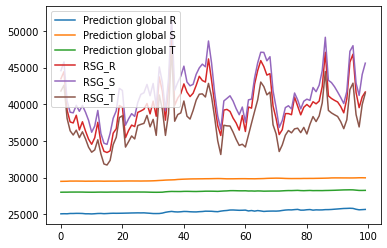

In [ ]:
plt.plot(range(len(L_true_R)),true_pre_r[Q:Q+N,0],label='Prediction global R')
plt.plot(range(len(L_true_R)),true_pre_r[Q:Q+N,1],label='Prediction global S')
plt.plot(range(len(L_true_R)),true_pre_r[Q:Q+N,2],label='Prediction global T')
plt.plot(range(len(L_true_R)),L_true_R,label='RSG_R')
plt.plot(range(len(L_true_S)),L_true_S,label='RSG_S')
plt.plot(range(len(L_true_T)),L_true_T,label='RSG_T')
plt.legend()
plt.show()